In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import pandas as pd

In [32]:
# Atenção na hora de escolher o tipo de grafo, pois alguns algoritmos podem não funcionar
# nx.DiGraph()  Cria um grafo direcional vazio
# nx.MultiGraph(), nx.MultiDiGraph() múltiplas arestas entre pares de vértices
# Graph.to_undirected() alterando um grafo direcionado para não direcionado
G = nx.Graph() #grafo não direcionado

In [33]:
# Coloca os vértices e arestas em uma lista
# forma explícita e grafo ponderado
vertices=['Viviane', 'Eloi', 'Jade', 'Eduardo','Camila','Maiara','Maria']
arestas=[('Viviane','Eloi',{'weight': 4}),('Viviane','Jade',{'weight': 5}),('Viviane','Camila',{'weight': 5}),
         ('Eloi','Jade',{'weight': 5}),('Eloi','Camila',{'weight': 3}),('Eloi','Eduardo',{'weight': 2}),
         ('Camila','Jade',{'weight': 3}),('Camila','Maiara',{'weight': 2}),
         ('Maria','Viviane',{'weight': 5}),('Maria','Camila',{'weight': 4}),('Maria','Jade',{'weight': 4})
        ]


# Coloca os vértices e arestas no grafo usando as listas
G.add_nodes_from(vertices)
G.add_edges_from(arestas)

In [48]:
nt = Network("300px", "900px", notebook = True)
nt.from_nx(G)
nt.show("g.html")

In [35]:
# número de vértices
G.number_of_nodes()

7

In [36]:
# número de arestas
G.number_of_edges()

11

In [49]:
# listar os vértices
list(G.nodes)

['Viviane', 'Eloi', 'Jade', 'Eduardo', 'Camila', 'Maiara', 'Maria']

In [38]:
# listar as arestas
list(G.edges)

[('Viviane', 'Eloi'),
 ('Viviane', 'Jade'),
 ('Viviane', 'Camila'),
 ('Viviane', 'Maria'),
 ('Eloi', 'Jade'),
 ('Eloi', 'Camila'),
 ('Eloi', 'Eduardo'),
 ('Jade', 'Camila'),
 ('Jade', 'Maria'),
 ('Camila', 'Maiara'),
 ('Camila', 'Maria')]

In [39]:
#Listar quais vértices estão ligados com um vértice específico
#list(G.adj['Viviane']) 
list(G.neighbors('Jade'))


['Viviane', 'Eloi', 'Camila', 'Maria']

In [40]:
# Grau de um vértice é o número de 'vizinhos' que ele possui
G.degree['Jade']

4

## Menor caminho para chegar de um vértice a outro

In [42]:
# Descobre o caminho de custo mínimo (ccm) do vértice '1' até '2' 
ccm = nx.dijkstra_path(G,source = 'Jade', target = 'Maiara')

# Mostra a sequência de vértices do caminho mínimo
print('Caminho de custo mínimo: ',ccm)

Caminho de custo mínimo:  ['Jade', 'Camila', 'Maiara']


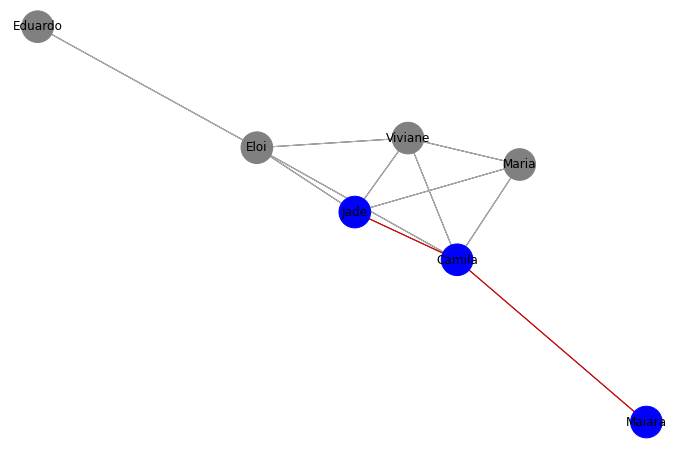

In [43]:
# Separa as arestas que fazem parte do menor caminho e guarda em arestas_vermelhas
arestas_vermelhas = list(zip(ccm,ccm[1:]))

# Marca os vértices que estão no CCM para serem pintados de azul e os outros de cinza
cor_vertices = ['grey' if not node in ccm else 'blue' for node in G.nodes()]

# Marca as arestas que estão no CCM para serem pintados de vermelho e as outras de prata
cor_arestas = ['silver' if not edge in arestas_vermelhas else 'red' for edge in G.edges()]

# plot da figura
plt.figure(1, figsize=(12, 8))

#Algoritmo de layout
pos=nx.fruchterman_reingold_layout(G)

#retira as bordas
plt.axis('off')

nx.draw_networkx(G, pos,node_color= cor_vertices, node_size=1000)
nx.draw_networkx_edges(G, pos,edge_color= cor_arestas)

plt.show()

## Qual vértice está mais conectado?

In [32]:
# centralidade de grau mede o número de arestas anexadas a um vértice
for node in G.nodes():
    print(node, nx.degree_centrality(G)[node])

Viviane 0.6666666666666666
Eloi 0.6666666666666666
Jade 0.6666666666666666
Eduardo 0.16666666666666666
Camila 0.8333333333333333
Maiara 0.16666666666666666
Maria 0.5


In [11]:
# centralidade de proximidade mede a distância média de um nó a qualquer outro nó
# Quanto mais central for um nó, mais próximo estará de todos os outros nós
for node in G.nodes():
    print(node, nx.closeness_centrality(G, node))

Viviane 0.16666666666666666
Eloi 0.2222222222222222
Jade 0.6666666666666666
Eduardo 0.25
Camila 0.5
Maiara 0.38095238095238093
Maria 0.0


In [12]:
# Centralidade de intermediação : mede o número de caminhos mais curtos em que o nó se encontra
# Essa centralidade costuma ser usada para determinar o fluxo de informações no gráfico
# Quanto maior o número, mais informações fluem por ele
for node in G.nodes(): 
    print(node, nx.betweenness_centrality(G)[node])

Viviane 0.06666666666666667
Eloi 0.06666666666666667
Jade 0.0
Eduardo 0.0
Camila 0.1
Maiara 0.0
Maria 0.0


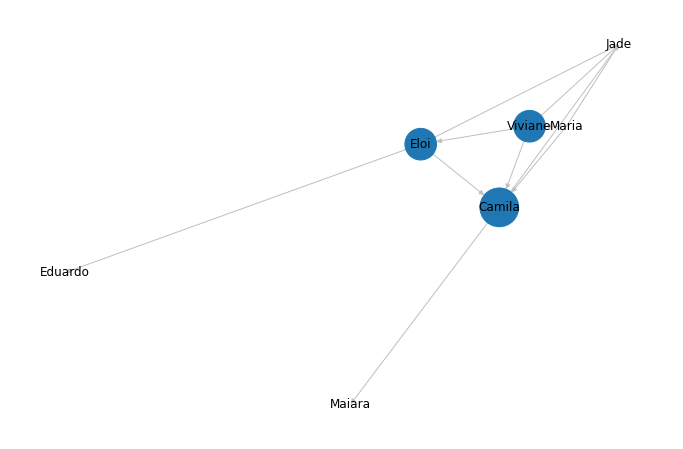

In [23]:
cent = nx.betweenness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 15000 for v in cent.values()], edge_color='silver')